# Decision trees solution

---
## Setup

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

In [2]:

np.random.seed(42)

In [3]:

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def plot_reg_tree(X, x_pred, Y, y_pred, title):
    plt.plot(X, y, "b.")
    plt.plot(x_pred, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
    plt.axis([0, 1, -0.2, 1.1])
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", fontsize=18, rotation=0)
    plt.legend(loc="upper center", fontsize=18)
    plt.title(title, fontsize=14)

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

## Clasification studentenset

In [5]:
import pickle
with open('data/toelating.pkl','rb') as f:
    data=pickle.load(f) 
X,y = data[:,0:2], data[:, 2]
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
tree_clf.predict_proba([[100, 100]])

array([[0.05357143, 0.94642857]])

In [7]:
tree_clf.predict([[100, 100]])

array([1.])

---

## Decicion Trees en Regressie

Optimal configuration

## Make training data

In [8]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10


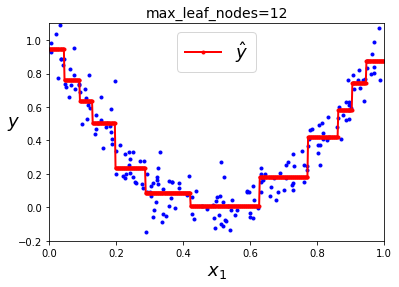

In [9]:

tree_reg = DecisionTreeRegressor(max_leaf_nodes=12, random_state=42)
tree_reg.fit(X, y)

x_pred = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred = tree_reg.predict(x_pred)
plot_reg_tree(X, x_pred, y, y_pred, 'max_leaf_nodes=12')
